<a href="https://colab.research.google.com/github/hisenberg2077/Pytorch-Codes/blob/main/Regression_01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
w = 0.3
b = 0.5

X = torch.arange(0,5,0.01).unsqueeze(1)
y = w*X + b

len(X)
len(y)

500

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.5000],
         [0.5030],
         [0.5060],
         [0.5090],
         [0.5120],
         [0.5150],
         [0.5180],
         [0.5210],
         [0.5240],
         [0.5270]]))

In [ ]:
split = int(0.8*len(X))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

len(X_test), len(y_test), len(X_train), len(y_train)



(100, 100, 400, 400)

In [ ]:
def plotfunction(y_preds = None):
  plt.figure(figsize = (10,7))

  plt.scatter(X_train, y_train, c = 'k', s = 3, label = 'Training Data')

  plt.scatter(X_test, y_test, c = 'b', s = 3, label = 'Test Data')

  if y_preds is not None:
    plt.scatter(X_test, y_preds, c = 'r', s = 3, label = 'Prediction Data')


  plt.legend()



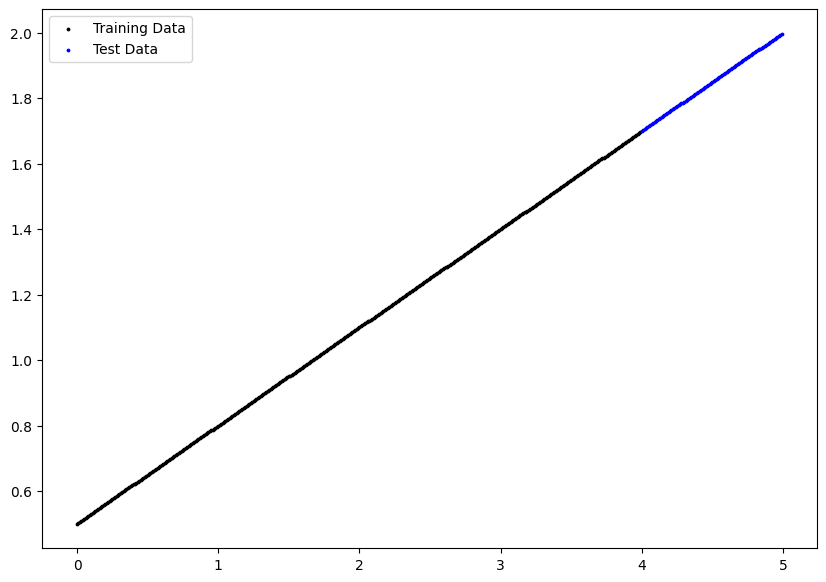

In [ ]:
plotfunction()

In [ ]:
class LinearModel(nn.Module):

  def __init__ (self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))

    self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype=torch.float))

  def forward(self, x: torch.tensor) -> torch.Tensor:
    return self.weight*x + self.bias


In [ ]:
model0 = LinearModel()

In [ ]:
model0.state_dict()

OrderedDict([('weight', tensor([0.7743])), ('bias', tensor([0.9671]))])

In [ ]:
with torch.inference_mode():
  y_preds = model0(X_test)

model0.weight, model0.bias, X_test[:10], y_preds[:10], y_test[:10]

(Parameter containing:
 tensor([0.7743], requires_grad=True),
 Parameter containing:
 tensor([0.9671], requires_grad=True),
 tensor([[4.0000],
         [4.0100],
         [4.0200],
         [4.0300],
         [4.0400],
         [4.0500],
         [4.0600],
         [4.0700],
         [4.0800],
         [4.0900]]),
 tensor([[4.0645],
         [4.0722],
         [4.0799],
         [4.0877],
         [4.0954],
         [4.1032],
         [4.1109],
         [4.1187],
         [4.1264],
         [4.1342]]),
 tensor([[1.7000],
         [1.7030],
         [1.7060],
         [1.7090],
         [1.7120],
         [1.7150],
         [1.7180],
         [1.7210],
         [1.7240],
         [1.7270]]))

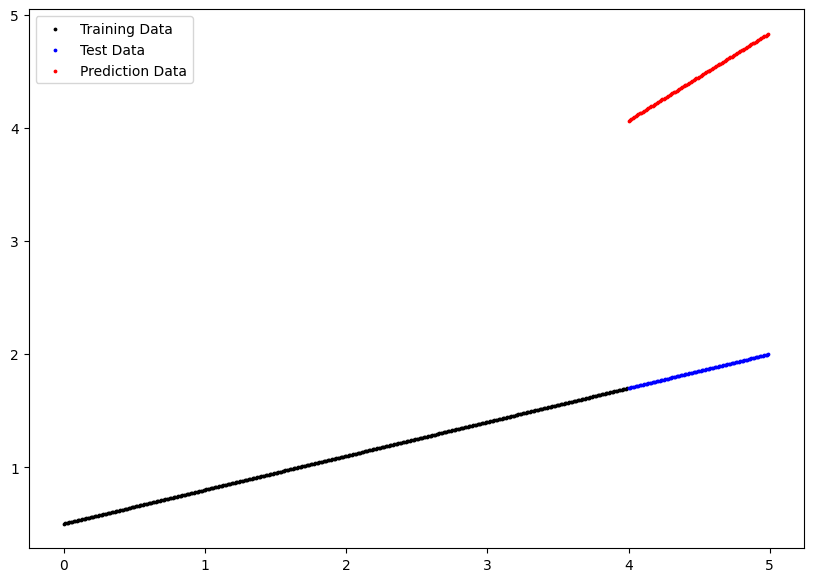

In [ ]:
plotfunction(y_preds)

In [ ]:
lossfunction = nn.L1Loss()

optimizer = torch.optim.SGD(params = model0.parameters(), lr=0.001)

In [ ]:
list(model0.parameters())

[Parameter containing:
 tensor([0.7743], requires_grad=True),
 Parameter containing:
 tensor([0.9671], requires_grad=True)]

In [ ]:
epoch_count = []
train_loss = []
test_loss = []


epochs = 500

for epoch in range (epochs):
  model0.train() #training mode

  #forward pass
  train_preds = model0(X_train)

  loss = lossfunction(train_preds, y_train)

  #gradzero
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #TESTINGGGG
  model0.eval()

  with torch.inference_mode():
    test_preds = model0(X_test)
    loss_of_preds = lossfunction(test_preds, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss.append(loss_of_preds.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {loss_of_preds} ")











Epoch: 0 | MAE Train Loss: 1.4133994579315186 | MAE Test Loss: 2.5892930030822754 
Epoch: 10 | MAE Train Loss: 1.3635989427566528 | MAE Test Loss: 2.489616632461548 
Epoch: 20 | MAE Train Loss: 1.313798189163208 | MAE Test Loss: 2.3899402618408203 
Epoch: 30 | MAE Train Loss: 1.2639974355697632 | MAE Test Loss: 2.290264129638672 
Epoch: 40 | MAE Train Loss: 1.214196801185608 | MAE Test Loss: 2.1905877590179443 
Epoch: 50 | MAE Train Loss: 1.1643961668014526 | MAE Test Loss: 2.0909111499786377 
Epoch: 60 | MAE Train Loss: 1.1145955324172974 | MAE Test Loss: 1.9912348985671997 
Epoch: 70 | MAE Train Loss: 1.0647947788238525 | MAE Test Loss: 1.8915585279464722 
Epoch: 80 | MAE Train Loss: 1.0149941444396973 | MAE Test Loss: 1.7918821573257446 
Epoch: 90 | MAE Train Loss: 0.965193510055542 | MAE Test Loss: 1.6922059059143066 
Epoch: 100 | MAE Train Loss: 0.9153927564620972 | MAE Test Loss: 1.5925296545028687 
Epoch: 110 | MAE Train Loss: 0.8655921816825867 | MAE Test Loss: 1.49285328388214

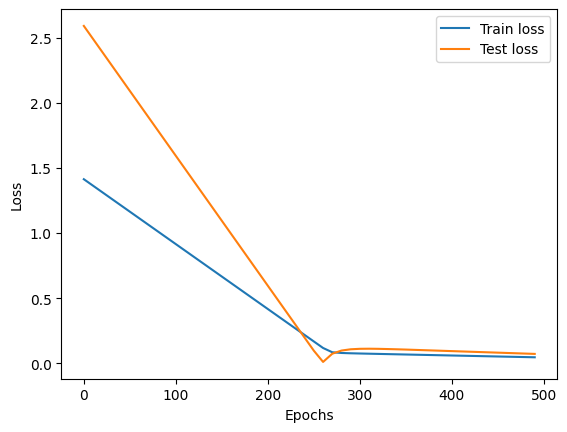

In [ ]:
plt.plot(epoch_count, train_loss, label = 'Train loss')
plt.plot(epoch_count, test_loss, label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

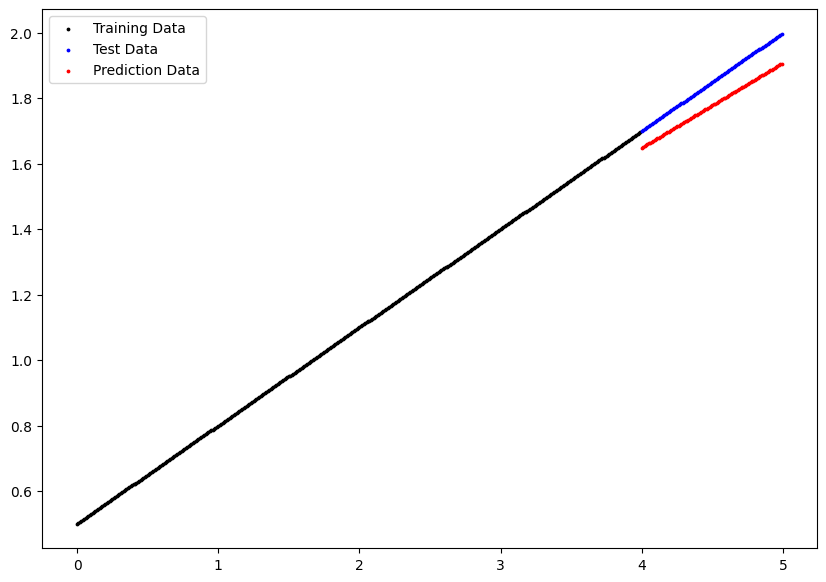

In [ ]:
plotfunction(test_preds)